In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.ensemble import RandomForestRegressor as RFR, AdaBoostRegressor as ABR, ExtraTreesRegressor as ETR, BaggingRegressor as BR
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline
from sklearn.model_selection import KFold
def kfold(k, predictor, X):
    kf = KFold(n_splits = k, random_state = 0)
    count = 0
    for trains, tests in kf.split(X):
        x_train = X.iloc[trains, 1:-1]
        y_train = X.iloc[trains, -1]
        x_test = X.iloc[tests, 1:-1]
        y_test = X.iloc[tests, -1]
        predictor.fit(x_train, y_train)
        predictions = predictor.predict(x_test)
        count += np.sqrt(mean_squared_error(predictions, y_test))
    return count/k

from collections import Counter

/Users/michaelyue/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [5]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [6]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [7]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [10]:
# Testing 4 ensemble methods vs. n_est
for n_est in range(50, 350, 25):
    print("RFR n =", n_est, ":", kfold(10, RFR(n_estimators=n_est), train))
    print("ABR n =", n_est, ":", kfold(10, ABR(n_estimators=n_est), train))
    print("BR n =", n_est, ":", kfold(10, BR(n_estimators=n_est), train))
    print("ETR n =", n_est, ":", kfold(10, ETR(n_estimators=n_est), train))

RFR n = 50 : 0.027152880683807758
ABR n = 50 : 0.029322638314763914
BR n = 50 : 0.027034923144826695
ETR n = 50 : 0.02718804400477707
RFR n = 75 : 0.026947865558143304
ABR n = 75 : 0.02944534852472768
BR n = 75 : 0.027098553115467532
ETR n = 75 : 0.027135860388625505
RFR n = 100 : 0.026913787983221815
ABR n = 100 : 0.029054524755758704
BR n = 100 : 0.026940555757043738
ETR n = 100 : 0.027120922569592427
RFR n = 125 : 0.026905848566217323
ABR n = 125 : 0.02933265211059597
BR n = 125 : 0.02689425214395493
ETR n = 125 : 0.027102500282994647
RFR n = 150 : 0.02686969225376329
ABR n = 150 : 0.028953887313950648
BR n = 150 : 0.02687091485696306
ETR n = 150 : 0.027009915629994073
RFR n = 175 : 0.026902252522980803
ABR n = 175 : 0.029551181493814267
BR n = 175 : 0.026846609024094546
ETR n = 175 : 0.02702222898198551
RFR n = 200 : 0.026848159874397166
ABR n = 200 : 0.029416299994313038
BR n = 200 : 0.026886047812234914
ETR n = 200 : 0.026992788363546842
RFR n = 225 : 0.0268363225102952
ABR n = 2

In [12]:
for n_est in range(50, 350, 25):
    rfr = RFR(n_estimators=n_est)
    rfr.fit(X_train, y_train)
    print("RFR n =", n_est, ":", scoreRMSE(rfr, X_train, y_train))
    
    abr = ABR(n_estimators=n_est)
    abr.fit(X_train, y_train)
    print("ABR n =", n_est, ":", scoreRMSE(abr, X_train, y_train))
    
    br = BR(n_estimators=n_est)
    br.fit(X_train, y_train)
    print("BR n =", n_est, ":", scoreRMSE(br, X_train, y_train))
    
    etr = ETR(n_estimators=n_est)
    etr.fit(X_train, y_train)
    print("ETR n =", n_est, ":", scoreRMSE(etr, X_train, y_train))

RFR n = 50 : 0.010459998106587457
ABR n = 50 : 0.028151063821895743
BR n = 50 : 0.01034430202642949
ETR n = 50 : 0.0021228399088563978
RFR n = 75 : 0.01032399737093872
ABR n = 75 : 0.029926560081168434
BR n = 75 : 0.010313168581899531
ETR n = 75 : 0.002122831449061378
RFR n = 100 : 0.010229984597762165
ABR n = 100 : 0.028404736816260247
BR n = 100 : 0.010205892617720832
ETR n = 100 : 0.002122830802281152
RFR n = 125 : 0.0102090449043317
ABR n = 125 : 0.029077167839701157
BR n = 125 : 0.010267924406875814
ETR n = 125 : 0.0021228265017234987
RFR n = 150 : 0.010116688958378568
ABR n = 150 : 0.02890635250886352
BR n = 150 : 0.010167699278428623
ETR n = 150 : 0.002122825485695412
RFR n = 175 : 0.010127141080715897
ABR n = 175 : 0.028213203332107056
BR n = 175 : 0.010124540857739922
ETR n = 175 : 0.002122825932854721
RFR n = 200 : 0.01014598470168394
ABR n = 200 : 0.02865194032684834
BR n = 200 : 0.010157547813377125
ETR n = 200 : 0.0021228240376605246
RFR n = 225 : 0.0100724017670848
ABR n 

In [13]:
# Naive implementations of several candidates just to compare
# preliminary relative 10-folds performance to random forests/gradient boosting

from sklearn.neural_network import MLPRegressor as MLP

mlp = MLP()
mlp.fit(X_train, y_train)

print("Training RMSE: ", scoreRMSE(mlp, X_train, y_train))

Training RMSE:  0.032418983721719974


In [98]:
kfold(10, MLP(hidden_layer_sizes=(1000,500,100,100,100),activation='logistic', alpha=0.00005, solver='sgd', learning_rate_init=0.0005), train)

0.02796802133524843

In [11]:
from sklearn.kernel_ridge import KernelRidge as KR

kfold(10, KR(alpha=1), train)

0.029742836179759823

In [107]:
from sklearn.svm import SVR

kfold(10, SVR(), train)

0.028141823013705915

In [122]:
from sklearn.tree import DecisionTreeRegressor as DTR

kfold(10, DTR(), train)

0.037553002433404196

In [124]:
from sklearn.neighbors import KNeighborsRegressor as KNR

kfold(10, KNR(n_neighbors=10, weights='distance'), train)

0.027492723581277672

In [136]:
kfold(10, KNR(n_neighbors=30, weights='uniform', algorithm='kd_tree'), train)

0.027032063335554347

In [140]:
kfold(10, RFR(n_estimators=1000), train)

0.02679644096620772

In [148]:
kfold(10, BR(n_estimators=1000), train)

0.0268210537288536

In [160]:
kfold(10, RFR(n_estimators=100), train)

0.02699775126973728

In [165]:
kfold(10, RFR(n_estimators=200, min_samples_leaf=100), train)

KeyboardInterrupt: 

In [9]:
# Tuning random forests at n_est=3000 with 4-fold cross-validation

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [10, 15, 20, 30, None],
    'min_samples_leaf': [1, 5, 10, 15, 20],
    'n_estimators': [3000],
    'random_state': [50]
}

rfR = RFR()
gs = GridSearchCV(estimator=rfR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(kfold(10, gs.best_estimator_, train))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[CV] max_depth=10, min_samples_leaf=1, n_estimators=3000, random_state=50 
[CV] max_depth=10, min_samples_leaf=1, n_estimators=3000, random_state=50 
[CV] max_depth=10, min_samples_leaf=1, n_estimators=3000, random_state=50 
[CV] max_depth=10, min_samples_leaf=1, n_estimators=3000, random_state=50 
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=3000, random_state=50, score=0.062127110194932667, total= 3.9min
[CV] max_depth=10, min_samples_leaf=5, n_estimators=3000, random_state=50 
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=3000, random_state=50, score=0.0749879081925846, total= 3.9min
[CV] max_depth=10, min_samples_leaf=5, n_estimators=3000, random_state=50 
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=3000, random_state=50, score=0.09544312974075686, total= 3.9min
[CV] max_depth=10, min_samples_leaf=5, n_estimators=3000, random_state=50 
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=3000, ran

KeyboardInterrupt: 

In [177]:
kfold(3, RFR(n_estimators=500, n_jobs=-1), train)

0.026882546415785885

In [201]:
gs.best_params_

{'max_depth': 15,
 'min_samples_leaf': 5,
 'n_estimators': 3000,
 'random_state': 50}

In [204]:
predictions = gs.best_estimator_.predict(test.iloc[:, 1:])

In [207]:
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.931733
1,2,0.912044
2,3,0.916009
3,4,0.925792
4,5,0.929910


In [208]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("tunedrfr_3000.csv", index=False)

In [209]:
params = {
    'max_depth': [10, 15, 20, 30, None],
    'min_samples_leaf': [1, 5, 10, 15, 20],
    'n_estimators': [2000],
    'random_state': [50]
}

gs2 = GridSearchCV(estimator=rfR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs2.fit(X_train, y_train)

print(gs2.best_params_)
print(kfold(10, gs2.best_estimator_, train))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[CV] max_depth=10, min_samples_leaf=1, n_estimators=2000, random_state=50 
[CV] max_depth=10, min_samples_leaf=1, n_estimators=2000, random_state=50 
[CV] max_depth=10, min_samples_leaf=1, n_estimators=2000, random_state=50 
[CV] max_depth=10, min_samples_leaf=1, n_estimators=2000, random_state=50 
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=2000, random_state=50, score=0.061358335889442506, total= 2.4min
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=2000, random_state=50, score=0.07474844022140092, total= 2.4min
[CV] max_depth=10, min_samples_leaf=5, n_estimators=2000, random_state=50 
[CV] max_depth=10, min_samples_leaf=5, n_estimators=2000, random_state=50 
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=2000, random_state=50, score=0.09566727341871328, total= 2.5min
[CV] max_depth=10, min_samples_leaf=5, n_estimators=2000, random_state=50 
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=2000, ra

KeyboardInterrupt: 

In [210]:
rfR2 = RFR(n_estimators=3000, n_jobs=-1, verbose=3)

rfR2.fit(X_train, y_train)

building tree 1 of 3000
building tree 2 of 3000
building tree 3 of 3000
building tree 4 of 3000
building tree 5 of 3000
building tree 6 of 3000
building tree 7 of 3000
building tree 8 of 3000
building tree 9 of 3000
building tree 10 of 3000
building tree 11 of 3000
building tree 12 of 3000
building tree 13 of 3000
building tree 14 of 3000
building tree 15 of 3000
building tree 16 of 3000
building tree 17 of 3000
building tree 18 of 3000
building tree 19 of 3000
building tree 20 of 3000
building tree 21 of 3000
building tree 22 of 3000
building tree 23 of 3000
building tree 24 of 3000
building tree 25 of 3000
building tree 26 of 3000
building tree 27 of 3000
building tree 28 of 3000


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s


building tree 29 of 3000
building tree 30 of 3000
building tree 31 of 3000
building tree 32 of 3000
building tree 33 of 3000
building tree 34 of 3000
building tree 35 of 3000
building tree 36 of 3000
building tree 37 of 3000
building tree 38 of 3000
building tree 39 of 3000
building tree 40 of 3000
building tree 41 of 3000
building tree 42 of 3000
building tree 43 of 3000
building tree 44 of 3000
building tree 45 of 3000
building tree 46 of 3000
building tree 47 of 3000
building tree 48 of 3000
building tree 49 of 3000
building tree 50 of 3000
building tree 51 of 3000
building tree 52 of 3000
building tree 53 of 3000
building tree 54 of 3000
building tree 55 of 3000
building tree 56 of 3000
building tree 57 of 3000
building tree 58 of 3000
building tree 59 of 3000
building tree 60 of 3000
building tree 61 of 3000
building tree 62 of 3000
building tree 63 of 3000
building tree 64 of 3000
building tree 65 of 3000
building tree 66 of 3000
building tree 67 of 3000
building tree 68 of 3000


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.5s


building tree 126 of 3000
building tree 127 of 3000
building tree 128 of 3000
building tree 129 of 3000
building tree 130 of 3000
building tree 131 of 3000
building tree 132 of 3000
building tree 133 of 3000
building tree 134 of 3000
building tree 135 of 3000
building tree 136 of 3000
building tree 137 of 3000
building tree 138 of 3000
building tree 139 of 3000
building tree 140 of 3000
building tree 141 of 3000
building tree 142 of 3000
building tree 143 of 3000
building tree 144 of 3000
building tree 145 of 3000
building tree 146 of 3000
building tree 147 of 3000
building tree 148 of 3000
building tree 149 of 3000
building tree 150 of 3000
building tree 151 of 3000
building tree 152 of 3000
building tree 153 of 3000
building tree 154 of 3000
building tree 155 of 3000
building tree 156 of 3000
building tree 157 of 3000
building tree 158 of 3000
building tree 159 of 3000
building tree 160 of 3000
building tree 161 of 3000
building tree 162 of 3000
building tree 163 of 3000
building tre

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   19.2s


building tree 285 of 3000
building tree 286 of 3000
building tree 287 of 3000
building tree 288 of 3000
building tree 289 of 3000
building tree 290 of 3000
building tree 291 of 3000
building tree 292 of 3000
building tree 293 of 3000
building tree 294 of 3000
building tree 295 of 3000
building tree 296 of 3000
building tree 297 of 3000
building tree 298 of 3000
building tree 299 of 3000
building tree 300 of 3000
building tree 301 of 3000
building tree 302 of 3000
building tree 303 of 3000
building tree 304 of 3000
building tree 305 of 3000
building tree 306 of 3000
building tree 307 of 3000
building tree 308 of 3000
building tree 309 of 3000
building tree 310 of 3000
building tree 311 of 3000
building tree 312 of 3000
building tree 313 of 3000
building tree 314 of 3000
building tree 315 of 3000
building tree 316 of 3000
building tree 317 of 3000
building tree 318 of 3000
building tree 319 of 3000
building tree 320 of 3000
building tree 321 of 3000
building tree 322 of 3000
building tre

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   34.6s


building tree 511 of 3000
building tree 512 of 3000
building tree 513 of 3000
building tree 514 of 3000
building tree 515 of 3000
building tree 516 of 3000
building tree 517 of 3000
building tree 518 of 3000
building tree 519 of 3000
building tree 520 of 3000
building tree 521 of 3000
building tree 522 of 3000
building tree 523 of 3000
building tree 524 of 3000
building tree 525 of 3000
building tree 526 of 3000
building tree 527 of 3000
building tree 528 of 3000
building tree 529 of 3000
building tree 530 of 3000
building tree 531 of 3000
building tree 532 of 3000
building tree 533 of 3000
building tree 534 of 3000
building tree 535 of 3000
building tree 536 of 3000
building tree 537 of 3000
building tree 538 of 3000
building tree 539 of 3000
building tree 540 of 3000
building tree 541 of 3000
building tree 542 of 3000
building tree 543 of 3000
building tree 544 of 3000
building tree 545 of 3000
building tree 546 of 3000
building tree 547 of 3000
building tree 548 of 3000
building tre

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   56.0s


building tree 799 of 3000
building tree 800 of 3000
building tree 801 of 3000
building tree 802 of 3000
building tree 803 of 3000
building tree 804 of 3000
building tree 805 of 3000
building tree 806 of 3000
building tree 807 of 3000
building tree 808 of 3000
building tree 809 of 3000
building tree 810 of 3000
building tree 811 of 3000
building tree 812 of 3000
building tree 813 of 3000
building tree 814 of 3000
building tree 815 of 3000
building tree 816 of 3000
building tree 817 of 3000
building tree 818 of 3000
building tree 819 of 3000
building tree 820 of 3000
building tree 821 of 3000
building tree 822 of 3000
building tree 823 of 3000
building tree 824 of 3000
building tree 825 of 3000
building tree 826 of 3000
building tree 827 of 3000
building tree 828 of 3000
building tree 829 of 3000
building tree 830 of 3000
building tree 831 of 3000
building tree 832 of 3000
building tree 833 of 3000
building tree 834 of 3000
building tree 835 of 3000
building tree 836 of 3000
building tre

building tree 1112 of 3000
building tree 1113 of 3000
building tree 1114 of 3000
building tree 1115 of 3000
building tree 1116 of 3000
building tree 1117 of 3000
building tree 1118 of 3000
building tree 1119 of 3000
building tree 1120 of 3000
building tree 1121 of 3000
building tree 1122 of 3000
building tree 1123 of 3000
building tree 1124 of 3000
building tree 1125 of 3000
building tree 1126 of 3000
building tree 1127 of 3000
building tree 1128 of 3000
building tree 1129 of 3000
building tree 1130 of 3000
building tree 1131 of 3000
building tree 1132 of 3000
building tree 1133 of 3000
building tree 1134 of 3000
building tree 1135 of 3000
building tree 1136 of 3000
building tree 1137 of 3000
building tree 1138 of 3000
building tree 1139 of 3000
building tree 1140 of 3000
building tree 1141 of 3000
building tree 1142 of 3000
building tree 1143 of 3000
building tree 1144 of 3000
building tree 1145 of 3000
building tree 1146 of 3000
building tree 1147 of 3000
building tree 1148 of 3000
b

[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.4min


building tree 1150 of 3000
building tree 1151 of 3000
building tree 1152 of 3000
building tree 1153 of 3000
building tree 1154 of 3000
building tree 1155 of 3000
building tree 1156 of 3000
building tree 1157 of 3000
building tree 1158 of 3000
building tree 1159 of 3000
building tree 1160 of 3000
building tree 1161 of 3000
building tree 1162 of 3000
building tree 1163 of 3000
building tree 1164 of 3000
building tree 1165 of 3000
building tree 1166 of 3000
building tree 1167 of 3000
building tree 1168 of 3000
building tree 1169 of 3000
building tree 1170 of 3000
building tree 1171 of 3000
building tree 1172 of 3000
building tree 1173 of 3000
building tree 1174 of 3000
building tree 1175 of 3000
building tree 1176 of 3000
building tree 1177 of 3000
building tree 1178 of 3000
building tree 1179 of 3000
building tree 1180 of 3000
building tree 1181 of 3000
building tree 1182 of 3000
building tree 1183 of 3000
building tree 1184 of 3000
building tree 1185 of 3000
building tree 1186 of 3000
b

building tree 1457 of 3000
building tree 1458 of 3000
building tree 1459 of 3000
building tree 1460 of 3000
building tree 1461 of 3000
building tree 1462 of 3000
building tree 1463 of 3000
building tree 1464 of 3000
building tree 1465 of 3000
building tree 1466 of 3000
building tree 1467 of 3000
building tree 1468 of 3000
building tree 1469 of 3000
building tree 1470 of 3000
building tree 1471 of 3000
building tree 1472 of 3000
building tree 1473 of 3000building tree 1474 of 3000

building tree 1475 of 3000
building tree 1476 of 3000
building tree 1477 of 3000
building tree 1478 of 3000
building tree 1479 of 3000
building tree 1480 of 3000
building tree 1481 of 3000
building tree 1482 of 3000
building tree 1483 of 3000
building tree 1484 of 3000
building tree 1485 of 3000
building tree 1486 of 3000
building tree 1487 of 3000
building tree 1488 of 3000
building tree 1489 of 3000
building tree 1490 of 3000
building tree 1491 of 3000
building tree 1492 of 3000
building tree 1493 of 3000
b

[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.9min


building tree 1565 of 3000
building tree 1566 of 3000
building tree 1567 of 3000
building tree 1568 of 3000
building tree 1569 of 3000
building tree 1570 of 3000
building tree 1571 of 3000
building tree 1572 of 3000
building tree 1573 of 3000
building tree 1574 of 3000
building tree 1575 of 3000
building tree 1576 of 3000
building tree 1577 of 3000
building tree 1578 of 3000
building tree 1579 of 3000
building tree 1580 of 3000
building tree 1581 of 3000
building tree 1582 of 3000
building tree 1583 of 3000
building tree 1584 of 3000
building tree 1585 of 3000
building tree 1586 of 3000
building tree 1587 of 3000
building tree 1588 of 3000
building tree 1589 of 3000
building tree 1590 of 3000
building tree 1591 of 3000
building tree 1592 of 3000
building tree 1593 of 3000
building tree 1594 of 3000
building tree 1595 of 3000
building tree 1596 of 3000
building tree 1597 of 3000
building tree 1598 of 3000
building tree 1599 of 3000
building tree 1600 of 3000
building tree 1601 of 3000
b

building tree 1869 of 3000
building tree 1870 of 3000
building tree 1871 of 3000
building tree 1872 of 3000
building tree 1873 of 3000
building tree 1874 of 3000
building tree 1875 of 3000
building tree 1876 of 3000
building tree 1877 of 3000
building tree 1878 of 3000
building tree 1879 of 3000
building tree 1880 of 3000
building tree 1881 of 3000
building tree 1882 of 3000
building tree 1883 of 3000
building tree 1884 of 3000
building tree 1885 of 3000
building tree 1886 of 3000
building tree 1887 of 3000
building tree 1888 of 3000
building tree 1889 of 3000
building tree 1890 of 3000
building tree 1891 of 3000
building tree 1892 of 3000
building tree 1893 of 3000
building tree 1894 of 3000
building tree 1895 of 3000
building tree 1896 of 3000
building tree 1897 of 3000
building tree 1898 of 3000
building tree 1899 of 3000
building tree 1900 of 3000
building tree 1901 of 3000
building tree 1902 of 3000
building tree 1903 of 3000
building tree 1904 of 3000
building tree 1905 of 3000
b

[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  2.4min


building tree 2044 of 3000
building tree 2045 of 3000
building tree 2046 of 3000
building tree 2047 of 3000
building tree 2048 of 3000
building tree 2049 of 3000
building tree 2050 of 3000
building tree 2051 of 3000
building tree 2052 of 3000
building tree 2053 of 3000
building tree 2054 of 3000
building tree 2055 of 3000
building tree 2056 of 3000
building tree 2057 of 3000
building tree 2058 of 3000
building tree 2059 of 3000
building tree 2060 of 3000
building tree 2061 of 3000
building tree 2062 of 3000
building tree 2063 of 3000
building tree 2064 of 3000
building tree 2065 of 3000
building tree 2066 of 3000
building tree 2067 of 3000
building tree 2068 of 3000
building tree 2069 of 3000
building tree 2070 of 3000
building tree 2071 of 3000
building tree 2072 of 3000
building tree 2073 of 3000
building tree 2074 of 3000
building tree 2075 of 3000
building tree 2076 of 3000
building tree 2077 of 3000
building tree 2078 of 3000
building tree 2079 of 3000
building tree 2080 of 3000
b

building tree 2350 of 3000
building tree 2351 of 3000
building tree 2352 of 3000
building tree 2353 of 3000
building tree 2354 of 3000
building tree 2355 of 3000
building tree 2356 of 3000
building tree 2357 of 3000
building tree 2358 of 3000
building tree 2359 of 3000
building tree 2360 of 3000
building tree 2361 of 3000
building tree 2362 of 3000
building tree 2363 of 3000
building tree 2364 of 3000
building tree 2365 of 3000
building tree 2366 of 3000
building tree 2367 of 3000
building tree 2368 of 3000
building tree 2369 of 3000
building tree 2370 of 3000
building tree 2371 of 3000
building tree 2372 of 3000
building tree 2373 of 3000
building tree 2374 of 3000
building tree 2375 of 3000
building tree 2376 of 3000
building tree 2377 of 3000
building tree 2378 of 3000
building tree 2379 of 3000
building tree 2380 of 3000
building tree 2381 of 3000
building tree 2382 of 3000
building tree 2383 of 3000
building tree 2384 of 3000
building tree 2385 of 3000
building tree 2386 of 3000
b

[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.2min


building tree 2589 of 3000
building tree 2590 of 3000
building tree 2591 of 3000
building tree 2592 of 3000
building tree 2593 of 3000
building tree 2594 of 3000
building tree 2595 of 3000
building tree 2596 of 3000
building tree 2597 of 3000
building tree 2598 of 3000
building tree 2599 of 3000
building tree 2600 of 3000
building tree 2601 of 3000
building tree 2602 of 3000
building tree 2603 of 3000
building tree 2604 of 3000
building tree 2605 of 3000
building tree 2606 of 3000
building tree 2607 of 3000
building tree 2608 of 3000
building tree 2609 of 3000
building tree 2610 of 3000
building tree 2611 of 3000
building tree 2612 of 3000
building tree 2613 of 3000
building tree 2614 of 3000
building tree 2615 of 3000
building tree 2616 of 3000
building tree 2617 of 3000
building tree 2618 of 3000
building tree 2619 of 3000
building tree 2620 of 3000
building tree 2621 of 3000
building tree 2622 of 3000
building tree 2623 of 3000
building tree 2624 of 3000
building tree 2625 of 3000
b

building tree 2895 of 3000
building tree 2896 of 3000
building tree 2897 of 3000
building tree 2898 of 3000
building tree 2899 of 3000
building tree 2900 of 3000
building tree 2901 of 3000
building tree 2902 of 3000
building tree 2903 of 3000
building tree 2904 of 3000
building tree 2905 of 3000
building tree 2906 of 3000
building tree 2907 of 3000
building tree 2908 of 3000
building tree 2909 of 3000
building tree 2910 of 3000
building tree 2911 of 3000
building tree 2912 of 3000
building tree 2913 of 3000
building tree 2914 of 3000
building tree 2915 of 3000
building tree 2916 of 3000
building tree 2917 of 3000
building tree 2918 of 3000
building tree 2919 of 3000
building tree 2920 of 3000
building tree 2921 of 3000
building tree 2922 of 3000
building tree 2923 of 3000
building tree 2924 of 3000
building tree 2925 of 3000
building tree 2926 of 3000
building tree 2927 of 3000
building tree 2928 of 3000
building tree 2929 of 3000
building tree 2930 of 3000
building tree 2931 of 3000
b

[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  3.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=3, warm_start=False)

In [211]:
params = {
    'n_estimators': [2000, 2500, 3000],
    'random_state': [50]
}

rfR3 = RFR()
gs3 = GridSearchCV(estimator=rfR3, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs3.fit(X_train, y_train)

print(gs3.best_params_)
print(kfold(10, gs2.best_estimator_, train))

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] n_estimators=2000, random_state=50 ..............................
[CV] n_estimators=2000, random_state=50 ..............................
[CV] n_estimators=2000, random_state=50 ..............................
[CV] n_estimators=2000, random_state=50 ..............................
[CV]  n_estimators=2000, random_state=50, score=0.06991290745877621, total= 6.1min
[CV] n_estimators=2500, random_state=50 ..............................
[CV]  n_estimators=2000, random_state=50, score=0.052604089443840096, total= 6.2min
[CV] n_estimators=2500, random_state=50 ..............................
[CV]  n_estimators=2000, random_state=50, score=0.07148754249047451, total= 6.2min
[CV] n_estimators=2500, random_state=50 ..............................
[CV]  n_estimators=2000, random_state=50, score=0.10584908761376832, total= 6.2min
[CV] n_estimators=2500, random_state=50 ..............................
[CV]  n_estimators=2500, random_state=5

[Parallel(n_jobs=4)]: Done  10 out of  12 | elapsed: 24.0min remaining:  4.8min


[CV]  n_estimators=3000, random_state=50, score=0.0712807381745596, total= 9.8min
[CV]  n_estimators=3000, random_state=50, score=0.10633545376947273, total= 9.8min


[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 24.0min finished


KeyboardInterrupt: 

In [216]:
rfR3 = RFR(n_estimators=3000, n_jobs=-1)
rfR3.fit(X_train, y_train)
predictions2 = rfR3.predict(test.iloc[:, 1:])

In [217]:
submission2 = pd.DataFrame(data=predictions2, columns=['Predicted'])
submission2.insert(0, "Id", range(1, 1 + test.shape[0]))
submission2['Id'] = submission2['Id'].astype(str)
submission2.head()

,Id,Predicted
0,1,0.938713
1,2,0.910050
2,3,0.916248
3,4,0.931032
4,5,0.931161


In [221]:
rfR4 = RFR(n_estimators=2500, n_jobs=-1)
rfR4.fit(X_train, y_train)
predictions3 = rfR4.predict(test.iloc[:, 1:])

submission3 = pd.DataFrame(data=predictions3, columns=['Predicted'])
submission3.insert(0, "Id", range(1, 1 + test.shape[0]))
submission3['Id'] = submission3['Id'].astype(str)
submission3.head()

,Id,Predicted
0,1,0.939374
1,2,0.910163
2,3,0.916366
3,4,0.930763
4,5,0.930731


In [220]:
submission3.to_csv("rfr_2000.csv", index=False)

In [223]:
br = BR(n_estimators=1500, n_jobs=-1)
br.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=1500, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [225]:
brpredict = br.predict(test.iloc[:, 1:])

submission4 = pd.DataFrame(data=brpredict, columns=['Predicted'])
submission4.insert(0, "Id", range(1, 1 + test.shape[0]))
submission4['Id'] = submission4['Id'].astype(str)
submission4.head()

,Id,Predicted
0,1,0.939037
1,2,0.910711
2,3,0.916856
3,4,0.930083
4,5,0.931816


In [226]:
submission4.to_csv("br1500.csv", index=False)

In [240]:
rfr15 = RFR(n_estimators=1500, n_jobs=-1)
rfr15.fit(X_train, y_train)

rfr15predict = rfr15.predict(test.iloc[:, 1:])

submission5 = pd.DataFrame(data=rfr15predict, columns=['Predicted'])
submission5.insert(0, "Id", range(1, 1 + test.shape[0]))
submission5['Id'] = submission5['Id'].astype(str)
submission5.head()

,Id,Predicted
0,1,0.940034
1,2,0.909831
2,3,0.915914
3,4,0.931259
4,5,0.931471


In [228]:
submission5.to_csv("rfr1500.csv", index=False)

In [230]:
# Tuning multilayer perceptron

params = {
    'hidden_layer_sizes': [(100, 100, 100, 100, 100, 100), (500, 500, 100, 100, 100, 100), (500, 500, 500, 500, 100, 100), (1000, 1000, 500, 500, 100, 100)],
    'alpha': [0.00005, 0.0001, 0.001]
}

mlp = MLP(activation='logistic', random_state=50)
gsmlp = GridSearchCV(estimator=mlp, param_grid=params, cv=4, n_jobs=4, verbose=3)
gsmlp.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] alpha=5e-05, hidden_layer_sizes=(100, 100, 100, 100, 100, 100) ..
[CV] alpha=5e-05, hidden_layer_sizes=(100, 100, 100, 100, 100, 100) ..
[CV] alpha=5e-05, hidden_layer_sizes=(100, 100, 100, 100, 100, 100) ..
[CV] alpha=5e-05, hidden_layer_sizes=(100, 100, 100, 100, 100, 100) ..
[CV]  alpha=5e-05, hidden_layer_sizes=(100, 100, 100, 100, 100, 100), score=-0.0022213548013956252, total=   2.4s
[CV]  alpha=5e-05, hidden_layer_sizes=(100, 100, 100, 100, 100, 100), score=-0.002131314202196588, total=   2.6s
[CV]  alpha=5e-05, hidden_layer_sizes=(100, 100, 100, 100, 100, 100), score=-0.006831750891926669, total=   2.5s
[CV]  alpha=5e-05, hidden_layer_sizes=(100, 100, 100, 100, 100, 100), score=-0.0002091274860729353, total=   2.6s
[CV] alpha=5e-05, hidden_layer_sizes=(500, 500, 100, 100, 100, 100) ..
[CV] alpha=5e-05, hidden_layer_sizes=(500, 500, 100, 100, 100, 100) ..
[CV] alpha=5e-05, hidden_layer_sizes=(500, 500, 100, 100, 1

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.3min


[CV]  alpha=0.0001, hidden_layer_sizes=(500, 500, 500, 500, 100, 100), score=-0.020967980529727814, total=  17.5s
[CV] alpha=0.0001, hidden_layer_sizes=(1000, 1000, 500, 500, 100, 100) 
[CV]  alpha=0.0001, hidden_layer_sizes=(500, 500, 500, 500, 100, 100), score=-0.0022096714331294454, total=  18.0s
[CV] alpha=0.0001, hidden_layer_sizes=(1000, 1000, 500, 500, 100, 100) 
[CV]  alpha=0.0001, hidden_layer_sizes=(500, 500, 500, 500, 100, 100), score=-0.0005379230199198393, total=  18.4s
[CV] alpha=0.0001, hidden_layer_sizes=(1000, 1000, 500, 500, 100, 100) 
[CV]  alpha=0.0001, hidden_layer_sizes=(500, 500, 500, 500, 100, 100), score=-0.0044789764674477706, total=  18.2s
[CV] alpha=0.0001, hidden_layer_sizes=(1000, 1000, 500, 500, 100, 100) 
[CV]  alpha=0.0001, hidden_layer_sizes=(1000, 1000, 500, 500, 100, 100), score=-0.003170416255596331, total=  33.8s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100, 100, 100) ..
[CV]  alpha=0.0001, hidden_layer_sizes=(1000, 1000, 500, 500, 100,

[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  3.4min finished


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [249]:
params = {
    'hidden_layer_sizes': [(400, 400, 100, 100, 100, 100), (500, 500, 100, 100, 100, 100), (600, 600, 100, 100, 100, 100)],
}

mlp = MLP(activation='logistic', solver='sgd', random_state=50, learning_rate_init=0.0001, alpha=0.001)
gsmlp = GridSearchCV(estimator=mlp, param_grid=params, cv=4, n_jobs=4, verbose=3)
gsmlp.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] hidden_layer_sizes=(400, 400, 100, 100, 100, 100) ...............
[CV] hidden_layer_sizes=(400, 400, 100, 100, 100, 100) ...............
[CV] hidden_layer_sizes=(400, 400, 100, 100, 100, 100) ...............
[CV] hidden_layer_sizes=(400, 400, 100, 100, 100, 100) ...............
[CV]  hidden_layer_sizes=(400, 400, 100, 100, 100, 100), score=-0.002782290238506402, total=  10.2s
[CV]  hidden_layer_sizes=(400, 400, 100, 100, 100, 100), score=-3.4159072292982984e-05, total=  10.3s
[CV] hidden_layer_sizes=(500, 500, 100, 100, 100, 100) ...............
[CV] hidden_layer_sizes=(500, 500, 100, 100, 100, 100) ...............
[CV]  hidden_layer_sizes=(400, 400, 100, 100, 100, 100), score=-0.005963434902424236, total=  10.7s
[CV] hidden_layer_sizes=(500, 500, 100, 100, 100, 100) ...............
[CV]  hidden_layer_sizes=(400, 400, 100, 100, 100, 100), score=-0.00409296081757593, total=  11.2s
[CV] hidden_layer_sizes=(500, 500, 100, 10

[Parallel(n_jobs=4)]: Done  10 out of  12 | elapsed:   35.4s remaining:    7.1s


[CV]  hidden_layer_sizes=(600, 600, 100, 100, 100, 100), score=-0.005812005858984559, total=  13.3s
[CV]  hidden_layer_sizes=(600, 600, 100, 100, 100, 100), score=-0.004077449499403363, total=  12.7s


[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   36.0s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=50, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'hidden_layer_sizes': [(400, 400, 100, 100, 100, 100), (500, 500, 100, 100, 100, 100), (600, 600, 100, 100, 100, 100)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [250]:
kfold(10, gsmlp.best_estimator_, train)

0.027972472343201306

In [251]:
mlppredict = gsmlp.best_estimator_.predict(test.iloc[:, 1:])

submission6 = pd.DataFrame(data=mlppredict, columns=['Predicted'])
submission6.insert(0, "Id", range(1, 1 + test.shape[0]))
submission6['Id'] = submission6['Id'].astype(str)
submission6.head()

,Id,Predicted
0,1,0.919634
1,2,0.919633
2,3,0.919634
3,4,0.919634
4,5,0.919634


In [252]:
submission6.to_csv("mlp.csv", index=False)

In [265]:
for alpha in [10 ** i for i in range(-10, 3)]:
    print(alpha, kfold(10, KR(alpha=alpha), train))

1e-10 0.12286565634644402
1e-09 0.03863578311622712
1e-08 0.028299272111959557
1e-07 0.028015169546417355
1e-06 0.02803103464463681
1e-05 0.02824344572416259
0.0001 0.02898097032911563
0.001 0.02936473830084192
0.01 0.0295075746989041
0.1 0.029742246754614492
1 0.029742836179759823
10 0.029627611424617967
100 0.032791740778805076


In [267]:
from sklearn.linear_model import Ridge

for alpha in [10 ** i for i in range(-10, 3)]:
    print(alpha, kfold(10, Ridge(alpha=alpha), train))

1e-10 0.1300089063100798
1e-09 0.04326022018991976
1e-08 0.028717990035703984
1e-07 0.027901701754626317
1e-06 0.027888444197910846
1e-05 0.02788803615147088
0.0001 0.02788759452119577
0.001 0.02788360438959959
0.01 0.02785337885849116
0.1 0.027728402147805052
1 0.027452928577104053
10 0.027242749342376932
100 0.027376528582641346


In [273]:
for alpha in [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:
    print(alpha, kfold(10, Ridge(alpha=alpha), train))

10 0.027242749342376932
11 0.027240361798796863
12 0.027238782187045653
13 0.027237842126003536
14 0.027237414559526107
15 0.02723740188015112
16 0.027237727947945684
17 0.027238332578745916
18 0.027239167648027012
19 0.02724019428075406
20 0.027241380788482417


In [272]:
bestRidge = Ridge(alpha=15)
bestRidge.fit(X_train, y_train)
ridgepredict = bestRidge.predict(test.iloc[:, 1:])

In [131]:
# Tuning kernel ridge

from sklearn.model_selection import GridSearchCV

params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear','polynomial', 'sigmoid', 'laplacian'],
    'degree': [5]
}

kr = KR()
gskr = GridSearchCV(estimator=kr, param_grid=params, cv=4, n_jobs=4, verbose=3)
gskr.fit(X_train, y_train)

print(gskr.best_params_)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] alpha=0.01, degree=5, kernel=linear .............................
[CV] alpha=0.01, degree=5, kernel=linear .............................
[CV] alpha=0.01, degree=5, kernel=linear .............................
[CV] alpha=0.01, degree=5, kernel=linear .............................
[CV]  alpha=0.01, degree=5, kernel=linear, score=0.027253408556165648, total=   3.8s
[CV] alpha=0.01, degree=5, kernel=polynomial .........................
[CV]  alpha=0.01, degree=5, kernel=linear, score=-0.10308601877978307, total=   3.9s
[CV]  alpha=0.01, degree=5, kernel=linear, score=-0.06035477642701137, total=   4.1s
[CV]  alpha=0.01, degree=5, kernel=linear, score=-0.4387546257181172, total=   4.0s
[CV] alpha=0.01, degree=5, kernel=polynomial .........................
[CV] alpha=0.01, degree=5, kernel=polynomial .........................
[CV] alpha=0.01, degree=5, kernel=polynomial .........................
[CV]  alpha=0.01, degree=5, kern

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   40.1s


[CV]  alpha=0.1, degree=5, kernel=sigmoid, score=0.03671089559635987, total=   2.3s
[CV] alpha=0.1, degree=5, kernel=laplacian ...........................
[CV]  alpha=0.1, degree=5, kernel=sigmoid, score=0.039474017661788374, total=   2.2s
[CV]  alpha=0.1, degree=5, kernel=sigmoid, score=0.03874061762254, total=   2.2s
[CV] alpha=0.1, degree=5, kernel=laplacian ...........................
[CV] alpha=0.1, degree=5, kernel=laplacian ...........................
[CV]  alpha=0.1, degree=5, kernel=sigmoid, score=0.05123023980507879, total=   1.8s
[CV] alpha=0.1, degree=5, kernel=laplacian ...........................
[CV]  alpha=0.1, degree=5, kernel=laplacian, score=0.05497721723113458, total=  10.0s
[CV] alpha=1, degree=5, kernel=linear ................................
[CV]  alpha=0.1, degree=5, kernel=laplacian, score=0.041127054691729614, total=  10.2s
[CV]  alpha=0.1, degree=5, kernel=laplacian, score=0.04150677943465253, total=  10.1s
[CV] alpha=1, degree=5, kernel=linear ..............

[CV]  alpha=100, degree=5, kernel=laplacian, score=-0.6318438017582717, total=  10.5s
[CV]  alpha=100, degree=5, kernel=laplacian, score=-0.7732679649108385, total=  10.8s


[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  2.3min finished


{'alpha': 0.1, 'degree': 5, 'kernel': 'laplacian'}


In [276]:
kfold(10, KR(alpha=0.1, kernel='laplacian'), train)

0.02716235436637317

In [279]:
krpredict = gskr.best_estimator_.predict(test.iloc[:, 1:])

submission8 = pd.DataFrame(data=krpredict, columns=['Predicted'])
submission8.insert(0, "Id", range(1, 1 + test.shape[0]))
submission8['Id'] = submission8['Id'].astype(str)
submission8.head()

,Id,Predicted
0,1,0.928695
1,2,0.913394
2,3,0.918961
3,4,0.931840
4,5,0.923172


In [280]:
submission8.to_csv("kr.csv", index=False)

In [17]:
# More n_est analysis

for n_est in [50, 100, 150, 200, 300, 400, 500, 750, 1000]:
    print("RFR n =", n_est, ":", kfold(5, RFR(n_estimators=n_est, random_state=50, n_jobs=4), train))
    print("ABR n =", n_est, ":", kfold(5, ABR(n_estimators=n_est, random_state=50), train))
    print("BR n =", n_est, ":", kfold(5, BR(n_estimators=n_est, random_state=50, n_jobs=4), train))
    print("ETR n =", n_est, ":", kfold(5, ETR(n_estimators=n_est, random_state=50, n_jobs=4), train))

RFR n = 50 : 0.02705291658433643
ABR n = 50 : 0.028649503965292155
BR n = 50 : 0.0270610860889704
ETR n = 50 : 0.027331120634888885
RFR n = 100 : 0.02692968607708654
ABR n = 100 : 0.028649503965292155
BR n = 100 : 0.026936153403063844
ETR n = 100 : 0.027218653780815016
RFR n = 150 : 0.02693283560780489
ABR n = 150 : 0.028649503965292155
BR n = 150 : 0.02691695728076937
ETR n = 150 : 0.027178657630401493
RFR n = 200 : 0.02692523963007199
ABR n = 200 : 0.028649503965292155
BR n = 200 : 0.026905604961093205
ETR n = 200 : 0.027143235082859186
RFR n = 300 : 0.026893909888482864
ABR n = 300 : 0.028649503965292155
BR n = 300 : 0.026903843640258367
ETR n = 300 : 0.0271188293286418
RFR n = 400 : 0.026887838108116624
ABR n = 400 : 0.028649503965292155
BR n = 400 : 0.02689096703049289
ETR n = 400 : 0.02712284487139559
RFR n = 500 : 0.026885875377998525
ABR n = 500 : 0.028649503965292155
BR n = 500 : 0.026892693538960916
ETR n = 500 : 0.02710615693472219
RFR n = 750 : 0.02687203305623213
ABR n = 7

In [18]:
for n_est in [50, 100, 150, 200, 300, 400, 500, 750, 1000]:
    print("RFR n =", n_est, ":", kfold(5, RFR(n_estimators=n_est, random_state=40, n_jobs=4), train))
    print("ABR n =", n_est, ":", kfold(5, ABR(n_estimators=n_est, random_state=40), train))
    print("BR n =", n_est, ":", kfold(5, BR(n_estimators=n_est, random_state=40, n_jobs=4), train))
    print("ETR n =", n_est, ":", kfold(5, ETR(n_estimators=n_est, random_state=40, n_jobs=4), train))

RFR n = 50 : 0.027164415494160776
ABR n = 50 : 0.029313871153457034
BR n = 50 : 0.027110324069706714
ETR n = 50 : 0.02726896525618902
RFR n = 100 : 0.02701084155903099
ABR n = 100 : 0.029313871153457034
BR n = 100 : 0.0269860864652349
ETR n = 100 : 0.027172267642285853
RFR n = 150 : 0.02694101695614845
ABR n = 150 : 0.029313871153457034
BR n = 150 : 0.026924773012323544
ETR n = 150 : 0.027125638464048602
RFR n = 200 : 0.026927012158246943
ABR n = 200 : 0.029313871153457034
BR n = 200 : 0.02691816683734672
ETR n = 200 : 0.0271328923968459
RFR n = 300 : 0.026896613875746756
ABR n = 300 : 0.029313871153457034
BR n = 300 : 0.026897840479847314
ETR n = 300 : 0.027104249889598375
RFR n = 400 : 0.026901825150474273
ABR n = 400 : 0.029313871153457034
BR n = 400 : 0.02690633581558219
ETR n = 400 : 0.027092452995255506
RFR n = 500 : 0.02690204077581141
ABR n = 500 : 0.029313871153457034
BR n = 500 : 0.02690233024776469
ETR n = 500 : 0.02708869630193928
RFR n = 750 : 0.026884329137684904
ABR n = 

In [22]:
# Additional RFR tuning at n_est=300

params = {
    'max_depth': [5, 15, 25, 35, 45],
    'min_samples_leaf': [1, 10, 20, 30]
}

rfR = RFR(n_estimators=300, random_state=50)
gsrfr = GridSearchCV(estimator=rfR, scoring='neg_mean_squared_error', param_grid=params, n_jobs=-1, cv=5, verbose=3)
gsrfr.fit(X_train, y_train)

print(gsrfr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV]  max_depth=5, min_samples_leaf=1, score=-0.0007493241842653842, total=  11.8s
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV]  max_depth=5, min_samples_leaf=1, score=-0.000724310089038383, total=  11.7s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV]  max_depth=5, min_samples_leaf=1, score=-0.0008344162824369213, total=  11.8s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV]  max_depth=5, min_samples_leaf=1, score=-0.000662863687607998, total=  11.9s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV]  max_depth=5, min_samples_leaf=10, 

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min


[CV]  max_depth=15, min_samples_leaf=10, score=-0.0007412709966138088, total=  24.5s
[CV] max_depth=15, min_samples_leaf=10 ...............................
[CV]  max_depth=15, min_samples_leaf=10, score=-0.0008127469481378861, total=  24.6s
[CV] max_depth=15, min_samples_leaf=10 ...............................
[CV]  max_depth=15, min_samples_leaf=10, score=-0.0006537203944198717, total=  24.6s
[CV] max_depth=15, min_samples_leaf=20 ...............................
[CV]  max_depth=15, min_samples_leaf=1, score=-0.0006955415891697044, total=  33.4s
[CV] max_depth=15, min_samples_leaf=20 ...............................
[CV]  max_depth=15, min_samples_leaf=20, score=-0.0007450436705725014, total=  20.0s
[CV] max_depth=15, min_samples_leaf=20 ...............................
[CV]  max_depth=15, min_samples_leaf=10, score=-0.0007098141476388169, total=  24.1s
[CV] max_depth=15, min_samples_leaf=20 ...............................
[CV]  max_depth=15, min_samples_leaf=10, score=-0.000696480586635

[CV]  max_depth=35, min_samples_leaf=30, score=-0.0006545859036046087, total=  17.7s
[CV] max_depth=45, min_samples_leaf=1 ................................
[CV]  max_depth=35, min_samples_leaf=30, score=-0.0007195553434525134, total=  17.4s
[CV] max_depth=45, min_samples_leaf=1 ................................
[CV]  max_depth=35, min_samples_leaf=30, score=-0.0006994069142386003, total=  17.4s
[CV] max_depth=45, min_samples_leaf=1 ................................
[CV]  max_depth=45, min_samples_leaf=1, score=-0.00072992703155188, total=  59.0s
[CV] max_depth=45, min_samples_leaf=1 ................................
[CV]  max_depth=45, min_samples_leaf=1, score=-0.0008184011765428323, total=  58.9s
[CV] max_depth=45, min_samples_leaf=10 ...............................
[CV]  max_depth=45, min_samples_leaf=1, score=-0.0006699597589792133, total=  59.9s
[CV] max_depth=45, min_samples_leaf=10 ...............................
[CV]  max_depth=45, min_samples_leaf=1, score=-0.0007059381773517987,

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.5min finished


{'max_depth': 15, 'min_samples_leaf': 1}


In [28]:
params = {
    'max_depth': [5, 10, 15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 5, 10, 15, 20, 25]
}

rfR = RFR(n_estimators=300, random_state=50)
gsrfr = GridSearchCV(estimator=rfR, scoring='neg_mean_squared_error', param_grid=params, n_jobs=-1, cv=5, verbose=3)
gsrfr.fit(X_train, y_train)

print(gsrfr.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV]  max_depth=5, min_samples_leaf=1, score=-0.000724310089038383, total=  12.8s
[CV] max_depth=5, min_samples_leaf=1 .................................
[CV]  max_depth=5, min_samples_leaf=1, score=-0.0007493241842653842, total=  12.9s
[CV] max_depth=5, min_samples_leaf=5 .................................
[CV]  max_depth=5, min_samples_leaf=1, score=-0.0008344162824369213, total=  12.9s
[CV] max_depth=5, min_samples_leaf=5 .................................
[CV]  max_depth=5, min_samples_leaf=1, score=-0.000662863687607998, total=  13.0s
[CV] max_depth=5, min_samples_leaf=5 .................................
[CV]  max_depth=5, min_samples_leaf=5, s

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min


[CV]  max_depth=5, min_samples_leaf=25, score=-0.0007514777692323965, total=  11.4s
[CV] max_depth=5, min_samples_leaf=25 ................................
[CV]  max_depth=5, min_samples_leaf=20, score=-0.0007046824158772954, total=  11.6s
[CV] max_depth=5, min_samples_leaf=25 ................................
[CV]  max_depth=5, min_samples_leaf=25, score=-0.000826787281143119, total=  11.6s
[CV] max_depth=10, min_samples_leaf=1 ................................
[CV]  max_depth=5, min_samples_leaf=25, score=-0.0006595929821097879, total=  11.5s
[CV] max_depth=10, min_samples_leaf=1 ................................
[CV]  max_depth=5, min_samples_leaf=25, score=-0.0007232262747547938, total=  12.0s
[CV] max_depth=10, min_samples_leaf=1 ................................
[CV]  max_depth=5, min_samples_leaf=25, score=-0.0007050162197506541, total=  12.1s
[CV] max_depth=10, min_samples_leaf=1 ................................
[CV]  max_depth=10, min_samples_leaf=1, score=-0.0008207336297914871, t

[CV]  max_depth=15, min_samples_leaf=15, score=-0.0006532159593633333, total=  24.6s
[CV] max_depth=15, min_samples_leaf=20 ...............................
[CV]  max_depth=15, min_samples_leaf=15, score=-0.0007168977874244083, total=  24.3s
[CV] max_depth=15, min_samples_leaf=20 ...............................
[CV]  max_depth=15, min_samples_leaf=15, score=-0.0006952673133177487, total=  24.8s
[CV] max_depth=15, min_samples_leaf=20 ...............................
[CV]  max_depth=15, min_samples_leaf=20, score=-0.0007450436705725014, total=  23.9s
[CV] max_depth=15, min_samples_leaf=20 ...............................
[CV]  max_depth=15, min_samples_leaf=20, score=-0.0008170051594841805, total=  24.1s
[CV] max_depth=15, min_samples_leaf=25 ...............................
[CV]  max_depth=15, min_samples_leaf=20, score=-0.0006538707105870384, total=  25.1s
[CV] max_depth=15, min_samples_leaf=25 ...............................
[CV]  max_depth=15, min_samples_leaf=20, score=-0.00071783356683

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 11.7min


[CV]  max_depth=25, min_samples_leaf=1, score=-0.0007290369097502298, total=  54.8s
[CV] max_depth=25, min_samples_leaf=1 ................................
[CV]  max_depth=25, min_samples_leaf=1, score=-0.000816231506145749, total=  55.0s
[CV] max_depth=25, min_samples_leaf=5 ................................
[CV]  max_depth=25, min_samples_leaf=1, score=-0.0006672728830377998, total=  53.7s
[CV] max_depth=25, min_samples_leaf=5 ................................
[CV]  max_depth=25, min_samples_leaf=1, score=-0.0007050593464696911, total=  53.5s
[CV] max_depth=25, min_samples_leaf=5 ................................
[CV]  max_depth=25, min_samples_leaf=5, score=-0.0007332983060982229, total=  36.3s
[CV] max_depth=25, min_samples_leaf=5 ................................
[CV]  max_depth=25, min_samples_leaf=5, score=-0.000810122674558885, total=  39.0s
[CV] max_depth=25, min_samples_leaf=5 ................................
[CV]  max_depth=25, min_samples_leaf=1, score=-0.0006987794738824265, to

[CV]  max_depth=30, min_samples_leaf=20, score=-0.0007179574983367239, total=  20.9s
[CV] max_depth=30, min_samples_leaf=25 ...............................
[CV]  max_depth=30, min_samples_leaf=20, score=-0.0006957324773569059, total=  21.7s
[CV] max_depth=30, min_samples_leaf=25 ...............................
[CV]  max_depth=30, min_samples_leaf=25, score=-0.0007467400107342905, total=  21.4s
[CV] max_depth=30, min_samples_leaf=25 ...............................
[CV]  max_depth=30, min_samples_leaf=25, score=-0.0008161102511921191, total=  21.6s
[CV] max_depth=35, min_samples_leaf=1 ................................
[CV]  max_depth=30, min_samples_leaf=25, score=-0.000655117555357487, total=  22.1s
[CV] max_depth=35, min_samples_leaf=1 ................................
[CV]  max_depth=30, min_samples_leaf=25, score=-0.0007178798048198951, total=  22.7s
[CV] max_depth=35, min_samples_leaf=1 ................................
[CV]  max_depth=30, min_samples_leaf=25, score=-0.000698615366402

[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 24.0min finished


{'max_depth': 15, 'min_samples_leaf': 5}


In [116]:
from math import *

def cv_rmse(GS, i):
    running = sqrt(-(GS.cv_results_['split0_test_score'][i]))
    running += sqrt(-(GS.cv_results_['split1_test_score'][i]))
    running += sqrt(-(GS.cv_results_['split2_test_score'][i]))
    running += sqrt(-(GS.cv_results_['split3_test_score'][i]))
    running += sqrt(-(GS.cv_results_['split4_test_score'][i]))
    return running/5*10000 - 268

resultsd = np.array([gsrfr.cv_results_['param_max_depth'][i] for i in range(len(gsrfr.cv_results_['params']))])
resultsl = np.array([gsrfr.cv_results_['param_min_samples_leaf'][i] for i in range(len(gsrfr.cv_results_['params']))])
resultscv = np.array([cv_rmse(gsrfr, i) for i in range(len(gsrfr.cv_results_['split0_test_score']))])

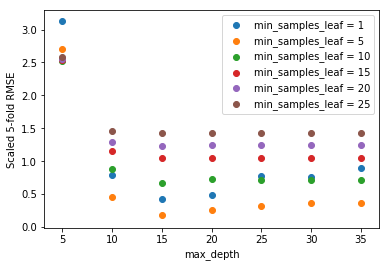

In [136]:
for i in range(6):
    plt.scatter(resultsd[i::6], resultscv[i::6], label=("min_samples_leaf = " + str(resultsl[i])))
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Scaled 5-fold RMSE')
plt.savefig('rfrgrid2.png')

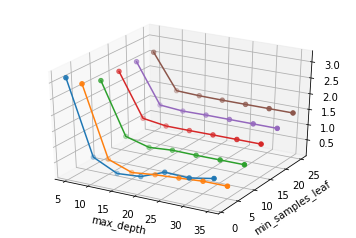

In [124]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')
for i in range(6):
    ax.scatter(resultsd[i::6], resultsl[i::6], resultscv[i::6])
    ax.plot(resultsd[i::6], resultsl[i::6], resultscv[i::6])
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.savefig('rfrgrid.png')

In [130]:
# 10-fold RFR nest=2000
new_params = {'n_estimators': [2000]}

rfR2 = RFR(random_state=50)
gsrfr22 = GridSearchCV(estimator=rfR2, scoring='neg_mean_squared_error', param_grid=new_params, n_jobs=-1, cv=10, verbose=3)
gsrfr22.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=2000 ...............................................
[CV] n_estimators=2000 ...............................................
[CV] n_estimators=2000 ...............................................
[CV] n_estimators=2000 ...............................................
[CV] .. n_estimators=2000, score=-0.0007649287251163518, total= 8.4min
[CV] n_estimators=2000 ...............................................
[CV] .. n_estimators=2000, score=-0.0007738380726630949, total= 8.4min
[CV] n_estimators=2000 ...............................................
[CV] .. n_estimators=2000, score=-0.0006880693821534702, total= 8.5min
[CV] n_estimators=2000 ...............................................
[CV] .. n_estimators=2000, score=-0.0008673338605855696, total= 8.5min
[CV] n_estimators=2000 ...............................................
[CV] ... n_estimators=2000, score=-0.000677096122168506, total= 8.1min
[CV] n_estimator

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 16.8min remaining:  7.2min


[CV] .. n_estimators=2000, score=-0.0006789765277761487, total= 8.2min
[CV] ... n_estimators=2000, score=-0.000740627714347862, total= 5.2min
[CV] .. n_estimators=2000, score=-0.0006411565517031741, total= 5.2min


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 22.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=50, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [133]:
g = gsrfr22.cv_results_

def correct(num):
    return sqrt(-num)

(correct(g['split0_test_score'][0])+correct(g['split1_test_score'][0])+correct(g['split2_test_score'][0])+correct(g['split3_test_score'][0])+correct(g['split4_test_score'][0])+correct(g['split5_test_score'][0])+correct(g['split6_test_score'][0])+correct(g['split7_test_score'][0])+correct(g['split8_test_score'][0])+correct(g['split9_test_score'][0]))/10

0.026802889915708384